# Case Study on Correlation and Regression
A textile company regularly spent money on five advertising companies for their
ads.
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

| 0 | 1|
| :- | -: |
| Add1(in Thousands) | 290 |
| Add2(in Thousands) | 312 |
| Add3(in Thousands) | 309 |
| Add4(in Thousands) | 298 |
| Add5(in Thousands) | 320 |

# Importing libraries and checking basic details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [5]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [9]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No null values in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


The advertisement money columns have correct data type (float64) instead of object.

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Add1(in Thousands),205.0,267.577561,26.219588,208.000,244.000,269.700,284.400,327.70
Add2(in Thousands),205.0,271.722439,25.914939,218.600,248.500,274.200,288.800,328.75
Add3(in Thousands),205.0,262.990732,26.126704,205.900,240.300,263.250,280.900,321.65
Add4(in Thousands),205.0,267.223902,26.238832,210.250,243.050,268.900,284.500,325.95
Add5(in Thousands),205.0,267.152683,26.215360,209.200,243.000,268.350,284.450,325.75
Profit(in Thousands),205.0,5059.630234,486.910414,4042.448,4617.695,5088.455,5387.438,6137.80


# Q and A

#### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

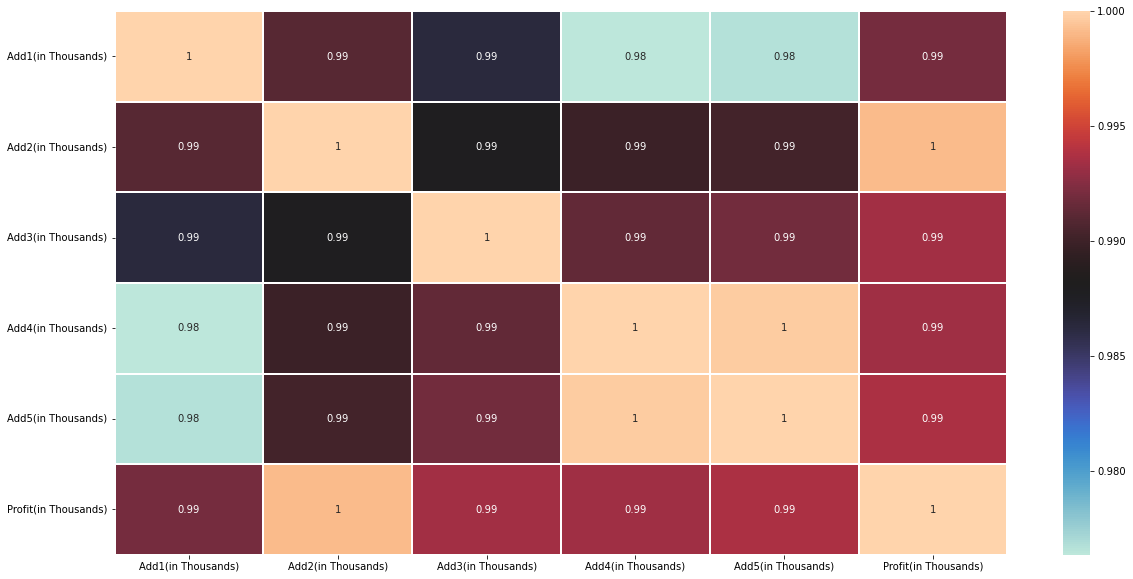

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(),annot=True,linewidth=0.2,cmap='icefire')

#### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [14]:
#splitting data to dependent variable(y) and independent variable(X)
X=data.drop(['Profit(in Thousands)','Date'],axis=1)
y=data['Profit(in Thousands)']

#creating training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

#importing model and fitting
from sklearn import linear_model
lr=linear_model.LinearRegression()

model=lr.fit(X_train,y_train)

predictions= model.predict(X_test)

print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [15]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [16]:
# R squared
model.score(X,y)

1.0

Since correlation is very high between variables linear regression model is predicting test sample values itself. R squared is coming as 1 which means its a perfect fit as per linear regression technique. But since all correlation is not 1 there is some chance of error

In [17]:
#Using Partial least squared regression model to find a best fit
from sklearn.cross_decomposition import PLSRegression

model1 = PLSRegression(n_components=2)
model1.fit(X, y)

plsprediction = model1.predict(X)

print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [18]:
plsprediction

array([[4053.68892165],
       [4049.66963937],
       [4204.45098398],
       [4366.8684526 ],
       [4377.98102399],
       [4418.28031121],
       [4428.09619675],
       [4486.65936343],
       [4435.03145438],
       [4438.26468376],
       [4427.79888486],
       [4449.11307467],
       [4475.57793   ],
       [4440.01823857],
       [4352.14700015],
       [4151.07088211],
       [4173.29326019],
       [4274.65012733],
       [4199.86777447],
       [4208.0817622 ],
       [4193.60944944],
       [4393.05293925],
       [4503.87267914],
       [4469.16750668],
       [4452.03586218],
       [4437.69809995],
       [4456.44932451],
       [4445.32553061],
       [4418.16203194],
       [4497.44083947],
       [4611.98376318],
       [4624.39669806],
       [4572.79438093],
       [4509.82335593],
       [4468.31748319],
       [4426.09786533],
       [4450.86356837],
       [4485.86688065],
       [4488.63836042],
       [4521.77546673],
       [4490.31399513],
       [4458.738

In [19]:
# R squared
model1.score(X,y)


0.9992897098959547

R squared value is very close to 1 and not exactly 1,so it seems to be a better fit.

#### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


In [20]:
sample_predict= [[290,312,309,298,320]]

In [21]:
#predicting using linear regression model
model.predict(sample_predict)

array([5820.06])

In [22]:
#predicting using partial least squared regression model
model1.predict(sample_predict)

array([[5738.49652423]])

Linear regression model prediction = 5820.06 

Partial least squared regression model = 5738.49